<a href="https://colab.research.google.com/github/mandeeep1984/Hello-World/blob/main/Electricity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/My Drive/ElectricityConsumptiondata.csv')

Mounted at /content/drive


In [3]:
df

,Usage Type,Amount Used,From (date/time),To (date/time)
0,Consumption,0.056,2025-05-10T23:30:00+10:00,2025-05-10T23:59:59+10:00
1,Consumption,0.000,2025-05-10T23:30:00+10:00,2025-05-10T23:59:59+10:00
2,Consumption,0.059,2025-05-10T23:00:00+10:00,2025-05-10T23:29:59+10:00
3,Consumption,0.000,2025-05-10T23:00:00+10:00,2025-05-10T23:29:59+10:00
4,Consumption,0.184,2025-05-10T22:30:00+10:00,2025-05-10T22:59:59+10:00
...,...,...,...,...
34745,Consumption,0.000,2024-04-26T01:00:00+10:00,2024-04-26T01:29:59+10:00
34746,Consumption,0.028,2024-04-26T00:30:00+10:00,2024-04-26T00:59:59+10:00
34747,Consumption,0.000,2024-04-26T00:30:00+10:00,2024-04-26T00:59:59+10:00
34748,Consumption,0.028,2024-04-26T00:00:00+10:00,2024-04-26T00:29:59+10:00


from matplotlib import pyplot as plt
df['Amount Used'].plot(kind='hist', bins=20, title='Amount Used')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Amount Used'].plot(kind='line', figsize=(8, 4), title='Amount Used')
plt.gca().spines[['top', 'right']].set_visible(False)

In [12]:
# Convert date/time columns to datetime objects
df["From (date/time)"] = pd.to_datetime(df["From (date/time)"])
df["To (date/time)"] = pd.to_datetime(df["To (date/time)"])

# Calculate duration in hours
df["Duration (hours)"] = (df["To (date/time)"] - df["From (date/time)"]).dt.total_seconds() / 3600

# Print the required columns
print(df[["From (date/time)", "To (date/time)", "Duration (hours)", "Consumption (kWh)"]])

<ipython-input-12-1d3985a4dff2>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["From (date/time)"] = pd.to_datetime(df["From (date/time)"])
<ipython-input-12-1d3985a4dff2>:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["To (date/time)"] = pd.to_datetime(df["To (date/time)"])


AttributeError: Can only use .dt accessor with datetimelike values

In [7]:
import matplotlib.pyplot as plt


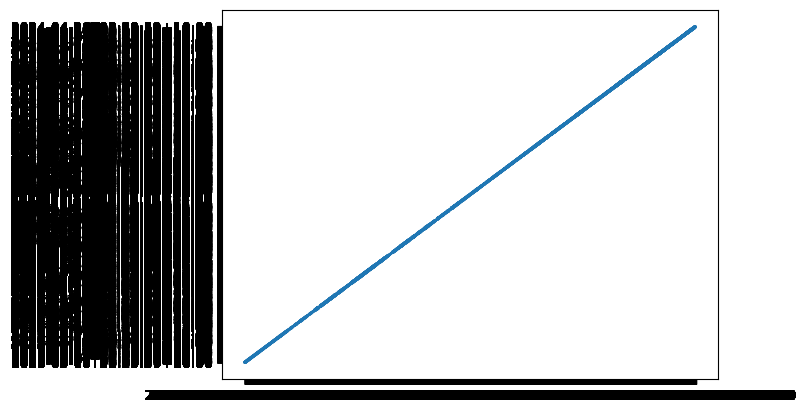

In [8]:
plt.scatter(df['From (date/time)'],df['To (date/time)'],df['Amount Used'])

In [4]:
df.shape

(34750, 4)

In [5]:
df = df.iloc[:,1:]

In [13]:
df

,Amount Used,From (date/time),To (date/time)
0,0.056,2025-05-10 23:30:00+10:00,2025-05-10 23:59:59+10:00
1,0.000,2025-05-10 23:30:00+10:00,2025-05-10 23:59:59+10:00
2,0.059,2025-05-10 23:00:00+10:00,2025-05-10 23:29:59+10:00
3,0.000,2025-05-10 23:00:00+10:00,2025-05-10 23:29:59+10:00
4,0.184,2025-05-10 22:30:00+10:00,2025-05-10 22:59:59+10:00
...,...,...,...
34745,0.000,2024-04-26 01:00:00+10:00,2024-04-26 01:29:59+10:00
34746,0.028,2024-04-26 00:30:00+10:00,2024-04-26 00:59:59+10:00
34747,0.000,2024-04-26 00:30:00+10:00,2024-04-26 00:59:59+10:00
34748,0.028,2024-04-26 00:00:00+10:00,2024-04-26 00:29:59+10:00


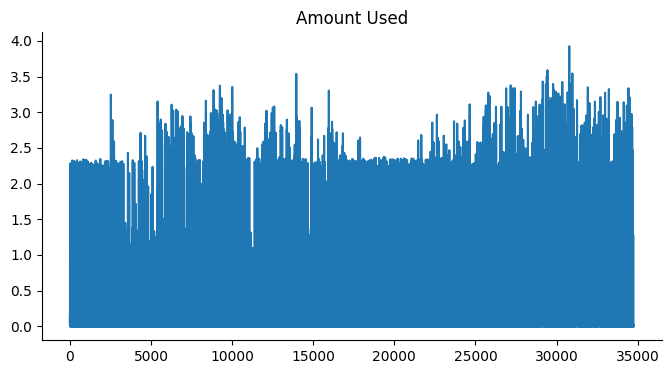

In [14]:
# @title Amount Used

from matplotlib import pyplot as plt
df['Amount Used'].plot(kind='line', figsize=(8, 4), title='Amount Used')
plt.gca().spines[['top', 'right']].set_visible(False)

In [17]:

# Convert time columns to datetime format
df['From (date/time)'] = pd.to_datetime(df['From (date/time)'])
df['To (date/time)'] = pd.to_datetime(df['To (date/time)'])

# Option 1: Create a combined string representation
df['Time Range'] = df['From (date/time)'].dt.strftime('%Y-%m-%d %H:%M:%S') + ' to ' + df['To (date/time)'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Option 2: Create a tuple of datetime objects
df['Time Range Tuple'] = list(zip(df['From (date/time)'], df['To (date/time)']))

# Option 3: Create a duration column (time difference)
df['Duration'] = df['To (date/time)'] - df['From (date/time)']

# Option 4: Create a single midpoint timestamp
df['Midpoint'] = df['From (date/time)'] + (df['To (date/time)'] - df['From (date/time)'])/2

# Display the result
print(df[['From (date/time)', 'To (date/time)', 'Time Range', 'Duration', 'Midpoint']].head())

ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True, at position 1675

In [18]:
# Convert time columns to datetime format
df['From (date/time)'] = pd.to_datetime(df['From (date/time)'], utc=True)
df['To (date/time)'] = pd.to_datetime(df['To (date/time)'], utc=True)

# Option 1: Create a combined string representation
df['Time Range'] = df['From (date/time)'].dt.strftime('%Y-%m-%d %H:%M:%S %Z') + ' to ' + df['To (date/time)'].dt.strftime('%Y-%m-%d %H:%M:%S %Z') # Added %Z to include timezone info

# Option 2: Create a tuple of datetime objects
df['Time Range Tuple'] = list(zip(df['From (date/time)'], df['To (date/time)']))

# Option 3: Create a duration column (time difference)
df['Duration'] = df['To (date/time)'] - df['From (date/time)']

# Option 4: Create a single midpoint timestamp
df['Midpoint'] = df['From (date/time)'] + (df['To (date/time)'] - df['From (date/time)'])/2

# Display the result
print(df[['From (date/time)', 'To (date/time)', 'Time Range', 'Duration', 'Midpoint']].head())

           From (date/time)            To (date/time)  \
0 2025-05-10 13:30:00+00:00 2025-05-10 13:59:59+00:00   
1 2025-05-10 13:30:00+00:00 2025-05-10 13:59:59+00:00   
2 2025-05-10 13:00:00+00:00 2025-05-10 13:29:59+00:00   
3 2025-05-10 13:00:00+00:00 2025-05-10 13:29:59+00:00   
4 2025-05-10 12:30:00+00:00 2025-05-10 12:59:59+00:00   

                                          Time Range        Duration  \
0  2025-05-10 13:30:00 UTC to 2025-05-10 13:59:59... 0 days 00:29:59   
1  2025-05-10 13:30:00 UTC to 2025-05-10 13:59:59... 0 days 00:29:59   
2  2025-05-10 13:00:00 UTC to 2025-05-10 13:29:59... 0 days 00:29:59   
3  2025-05-10 13:00:00 UTC to 2025-05-10 13:29:59... 0 days 00:29:59   
4  2025-05-10 12:30:00 UTC to 2025-05-10 12:59:59... 0 days 00:29:59   

                          Midpoint  
0 2025-05-10 13:44:59.500000+00:00  
1 2025-05-10 13:44:59.500000+00:00  
2 2025-05-10 13:14:59.500000+00:00  
3 2025-05-10 13:14:59.500000+00:00  
4 2025-05-10 12:44:59.500000+00:00  


In [19]:
df

,Amount Used,From (date/time),To (date/time),Time Range,Time Range Tuple,Duration,Midpoint
0,0.056,2025-05-10 13:30:00+00:00,2025-05-10 13:59:59+00:00,2025-05-10 13:30:00 UTC to 2025-05-10 13:59:59...,"(2025-05-10 13:30:00+00:00, 2025-05-10 13:59:5...",0 days 00:29:59,2025-05-10 13:44:59.500000+00:00
1,0.000,2025-05-10 13:30:00+00:00,2025-05-10 13:59:59+00:00,2025-05-10 13:30:00 UTC to 2025-05-10 13:59:59...,"(2025-05-10 13:30:00+00:00, 2025-05-10 13:59:5...",0 days 00:29:59,2025-05-10 13:44:59.500000+00:00
2,0.059,2025-05-10 13:00:00+00:00,2025-05-10 13:29:59+00:00,2025-05-10 13:00:00 UTC to 2025-05-10 13:29:59...,"(2025-05-10 13:00:00+00:00, 2025-05-10 13:29:5...",0 days 00:29:59,2025-05-10 13:14:59.500000+00:00
3,0.000,2025-05-10 13:00:00+00:00,2025-05-10 13:29:59+00:00,2025-05-10 13:00:00 UTC to 2025-05-10 13:29:59...,"(2025-05-10 13:00:00+00:00, 2025-05-10 13:29:5...",0 days 00:29:59,2025-05-10 13:14:59.500000+00:00
4,0.184,2025-05-10 12:30:00+00:00,2025-05-10 12:59:59+00:00,2025-05-10 12:30:00 UTC to 2025-05-10 12:59:59...,"(2025-05-10 12:30:00+00:00, 2025-05-10 12:59:5...",0 days 00:29:59,2025-05-10 12:44:59.500000+00:00
...,...,...,...,...,...,...,...
34745,0.000,2024-04-25 15:00:00+00:00,2024-04-25 15:29:59+00:00,2024-04-25 15:00:00 UTC to 2024-04-25 15:29:59...,"(2024-04-25 15:00:00+00:00, 2024-04-25 15:29:5...",0 days 00:29:59,2024-04-25 15:14:59.500000+00:00
34746,0.028,2024-04-25 14:30:00+00:00,2024-04-25 14:59:59+00:00,2024-04-25 14:30:00 UTC to 2024-04-25 14:59:59...,"(2024-04-25 14:30:00+00:00, 2024-04-25 14:59:5...",0 days 00:29:59,2024-04-25 14:44:59.500000+00:00
34747,0.000,2024-04-25 14:30:00+00:00,2024-04-25 14:59:59+00:00,2024-04-25 14:30:00 UTC to 2024-04-25 14:59:59...,"(2024-04-25 14:30:00+00:00, 2024-04-25 14:59:5...",0 days 00:29:59,2024-04-25 14:44:59.500000+00:00
34748,0.028,2024-04-25 14:00:00+00:00,2024-04-25 14:29:59+00:00,2024-04-25 14:00:00 UTC to 2024-04-25 14:29:59...,"(2024-04-25 14:00:00+00:00, 2024-04-25 14:29:5...",0 days 00:29:59,2024-04-25 14:14:59.500000+00:00


In [3]:
# Convert time columns to datetime format
df = pd.read_csv('/content/drive/My Drive/ElectricityConsumptiondata.csv')
df['From (date/time)'] = pd.to_datetime(df['From (date/time)'], utc=True)
df['To (date/time)'] = pd.to_datetime(df['To (date/time)'], utc=True)

# Use 'From (date/time)' as the index for the time series
# Make sure it's sorted by time
# Ensure that 'Consumption (kWh)' is included before setting the index
# Removed the line df = df.iloc[:,1:] as it was dropping the first column,
# potentially affecting the 'Consumption (kWh)' column's presence or position later.
df_ts = df.set_index('From (date/time)').sort_index()

# Select the column you want to forecast
# Now, 'Consumption (kWh)' should be present in df_ts
consumption_ts = df_ts['Amount Used']

# Resample to a regular frequency if needed (e.g., hourly 'H')
# This is often necessary for time series models.
# Choose the appropriate aggregation method (mean, sum, etc.) based on your data.
# For consumption over an interval, 'sum' or 'mean' might be appropriate depending
# on how the original data is structured. Let's assume sum for simplicity here.
# You might need to inspect your data to determine the best frequency and aggregation.
# Assuming your data is irregular, resample to hourly and sum up consumption within each hour.
consumption_ts_resampled = consumption_ts.resample('H').sum()

# Drop NaNs created by resampling if there were gaps
consumption_ts_resampled = consumption_ts_resampled.dropna()

# Now 'consumption_ts_resampled' is a time series with a datetime index

# --- Forecasting using Prophet ---
# You'll need to install prophet
!pip install prophet -q # Added -q for quiet install

from prophet import Prophet

# Prophet requires a DataFrame with 'ds' (datetime) and 'y' (value) columns
# Changed the rename to map 'Amount Used' to 'y'
prophet_df = consumption_ts_resampled.reset_index().rename(columns={'From (date/time)': 'ds', 'Amount Used': 'y'})

# Initialize the Prophet model
model = Prophet()

# Fit the model to your data
model.fit(prophet_df)

# Create a DataFrame with future dates for forecasting
future = model.make_future_dataframe(periods=24*7) # Forecast for the next 7 days (24 hours * 7 days)

# Make predictions
forecast = model.predict(future)

# --- Plotting ---
import matplotlib.pyplot as plt

# Plot the historical data and the forecast
fig = model.plot(forecast)
plt.title('Electricity Consumption Forecast')
plt.xlabel('Time')
plt.ylabel('Consumption (kWh)') # Keep label as consumption for clarity
plt.show()

# Plot the components of the forecast (trend, seasonality)
fig2 = model.plot_components(forecast)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/ElectricityConsumptiondata.csv'

In [2]:
# Convert time columns to datetime format
import pandas as pd # Import pandas

df['From (date/time)'] = pd.to_datetime(df['From (date/time)'], utc=True)
df['To (date/time)'] = pd.to_datetime(df['To (date/time)'], utc=True)

# Use 'From (date/time)' as the index for the time series
# Make sure it's sorted by time
# Ensure that 'Consumption (kWh)' is included before setting the index
# Removed the line df = df.iloc[:,1:] as it was dropping the first column,
# potentially affecting the 'Consumption (kWh)' column's presence or position later.
df_ts = df.set_index('From (date/time)').sort_index()

# Select the column you want to forecast
# Now, 'Consumption (kWh)' should be present in df_ts
consumption_ts = df_ts['Amount Used']

# Resample to a regular frequency if needed (e.g., hourly 'H')
# This is often necessary for time series models.
# Choose the appropriate aggregation method (mean, sum, etc.) based on your data.
# For consumption over an interval, 'sum' or 'mean' might be appropriate depending
# on how the original data is structured. Let's assume sum for simplicity here.
# You might need to inspect your data to determine the best frequency and aggregation.
# Assuming your data is irregular, resample to hourly and sum up consumption within each hour.
consumption_ts_resampled = consumption_ts.resample('H').sum()

# Drop NaNs created by resampling if there were gaps
consumption_ts_resampled = consumption_ts_resampled.dropna()

# Now 'consumption_ts_resampled' is a time series with a datetime index

# --- Forecasting using Prophet ---
# You'll need to install prophet
!pip install prophet -q # Added -q for quiet install

from prophet import Prophet

# Prophet requires a DataFrame with 'ds' (datetime) and 'y' (value) columns
# Changed the rename to map 'Amount Used' to 'y'
prophet_df = consumption_ts_resampled.reset_index().rename(columns={'From (date/time)': 'ds', 'Amount Used': 'y'})

# Initialize the Prophet model
model = Prophet()

# Fit the model to your data
model.fit(prophet_df)

# Create a DataFrame with future dates for forecasting
future = model.make_future_dataframe(periods=24*7) # Forecast for the next 7 days (24 hours * 7 days)

# Make predictions
forecast = model.predict(future)

# --- Plotting ---
import matplotlib.pyplot as plt

# Plot the historical data and the forecast
fig = model.plot(forecast)
plt.title('Electricity Consumption Forecast')
plt.xlabel('Time')
plt.ylabel('Consumption (kWh)') # Keep label as consumption for clarity
plt.show()

# Plot the components of the forecast (trend, seasonality)
fig2 = model.plot_components(forecast)
plt.show()

NameError: name 'df' is not defined